In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# Get training dataset
train_df = pd.read_csv('../input/titanic/train.csv')
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
# Get test dataset
test_df = pd.read_csv('../input/titanic/test.csv')
test_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [4]:
# train data info

print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
# test data info

print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


> Basic EDA

In [6]:
print(' Sex value counts :\n',train_df['Sex'].value_counts())
print('\n Cabin value counts :\n',train_df['Cabin'].value_counts())
print('\n Embarked vlaue counts :\n',train_df['Embarked'].value_counts())

 Sex value counts :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin value counts :
 G6             4
C23 C25 C27    4
B96 B98        4
F33            3
F2             3
              ..
B80            1
B101           1
A36            1
A32            1
B69            1
Name: Cabin, Length: 147, dtype: int64

 Embarked vlaue counts :
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

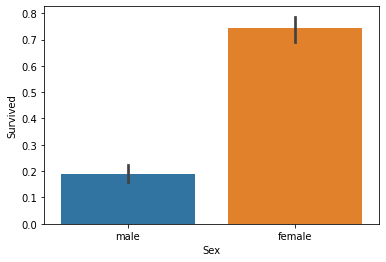

In [7]:
import seaborn as sns

sns.barplot(x='Sex', y = 'Survived', data=train_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

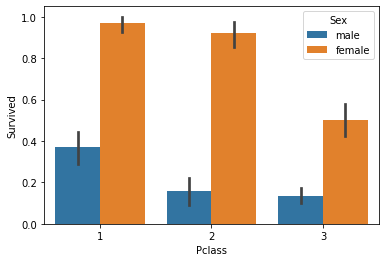

In [8]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train_df)

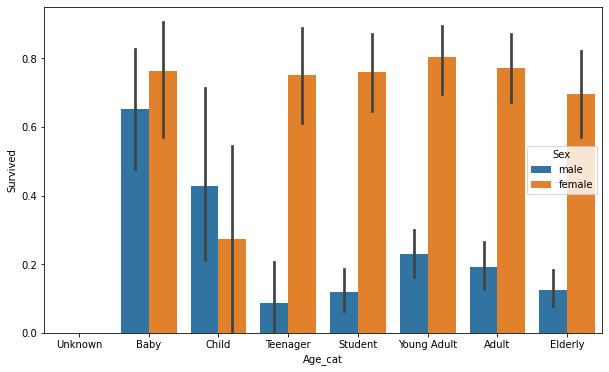

In [9]:
import matplotlib.pyplot as plt

# Split age using apply lambda 
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

plt.figure(figsize=(10,6))

group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

train_df['Age_cat'] = train_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=train_df, order=group_names)
train_df.drop('Age_cat', axis=1, inplace=True)

> Preprocessing

In [10]:
from sklearn.preprocessing import LabelEncoder

# Handling NULL
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)

    return df

# Drop useless features for machine learning
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'] ,axis=1,inplace=True)
    return df

# label encoding. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [11]:
train_df = pd.read_csv('../input/titanic/train.csv')
y_train = train_df['Survived']
X_train= train_df.drop('Survived',axis=1)

X_train = transform_features(X_train)

In [12]:
test_df = pd.read_csv('../input/titanic/test.csv')

X_test = transform_features(test_df)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val=train_test_split(X_train, y_train, \
                                                  test_size=0.2, random_state=11)

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Construct Classifier class for DecisionTree, Random Forest, LogisticRegression,  Classifier 
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(n_estimators= 500,random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier train/val/
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_val)
print('DecisionTreeClassifier Accuracy: {0:.4f}'.format(accuracy_score(y_val, dt_pred)))

# RandomForestClassifier train/val/
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_val)
print('RandomForestClassifier Accuracy:{0:.4f}'.format(accuracy_score(y_val, rf_pred)))

# LogisticRegression train/val/
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_val)
print('LogisticRegression Accuracy: {0:.4f}'.format(accuracy_score(y_val, lr_pred)))

DecisionTreeClassifier Accuracy: 0.7877
RandomForestClassifier Accuracy:0.8492
LogisticRegression Accuracy: 0.8492


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [15]:
from sklearn.model_selection import GridSearchCV

parameters = {
             'max_depth':[2,3,5,10,12,15,17,20],
             'min_samples_split':[2,3,5,6,8,10], 
              'min_samples_leaf':[1,5,8,10,13,15]
}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV Best_Params :',grid_dclf.best_params_)
print('GridSearchCV Best_score: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
#accuracy = accuracy_score(y_test , dpredictions)
#print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))


GridSearchCV Best_Params : {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
GridSearchCV Best_score: 0.8006


In [16]:
finals_pred = best_dclf.predict(X_test)

finals_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [17]:
predict = pd.DataFrame(finals_pred)
sub_d = pd.read_csv('../input/titanic/gender_submission.csv')
sub_d['Survived'] = predict
sub_d.to_csv('Submissionsd.csv', index = False)

In [18]:
submission =  pd.read_csv('Submissionsd.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
